In [1]:
# read the data set from ./data/train.csv and ./data/test.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import IsolationForest
import scipy.stats as stats
import seaborn as sns

# read the data set
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# print the size of the data set
print('Train data size:', train.shape)
print('Test data size:', test.shape)

Train data size: (3539, 33)
Test data size: (876, 33)


In [2]:
# print the type of each features
print(train.dtypes)

# print the first 5 rows of the data set
print(train.head(5))

C0                        object
C1                        object
C2                        object
C3                        object
C4                        object
C5                        object
C6                       float64
C7                        object
C8                        object
C9                        object
C10                       object
C11                       object
C12                       object
C13                       object
C14                        int64
C15                       object
C16                        int64
C17                      float64
C18                        int64
C19                        int64
C20                      float64
C21                        int64
C22                      float64
C23                      float64
C24                        int64
C25                      float64
C26                      float64
C27                        int64
C28                      float64
C29                      float64
C30       

In [3]:
# find the missing values
print(train.isnull().sum())

# print the proportion of the missing values
print((train.isnull().sum()/train.shape[0])*100)

C0                        29
C1                         0
C2                         0
C3                         0
C4                        49
C5                       108
C6                         0
C7                         0
C8                        82
C9                       142
C10                        0
C11                      158
C12                      170
C13                      120
C14                        0
C15                      138
C16                        0
C17                      148
C18                        0
C19                        0
C20                      171
C21                        0
C22                       16
C23                       28
C24                        0
C25                      144
C26                        0
C27                        0
C28                        0
C29                      160
C30                        0
regression target          0
classification target      0
dtype: int64
C0                       0.819

                C6          C14          C16          C17          C18  \
count  3539.000000  3539.000000  3539.000000  3391.000000  3539.000000   
mean     66.324696    23.204012     0.683526     6.242996     8.248375   
std       6.619953     7.427675     2.275012     2.475471     4.202098   
min      47.500000    17.000000     0.000000     0.000000     0.000000   
25%      62.500000    19.000000     0.000000     5.000000     6.000000   
50%      66.550000    20.000000     0.000000     6.000000     8.000000   
75%      70.000000    25.000000     0.000000     7.000000    10.000000   
max      95.000000    70.000000    20.000000    26.000000    45.000000   

               C19          C20          C21          C22          C23  \
count  3539.000000  3368.000000  3539.000000  3523.000000  3511.000000   
mean      4.693416    10.624829     0.131958     0.522566     6.182284   
std       3.064981     4.852394     0.678628     1.853137     2.192147   
min       0.000000     0.000000     0

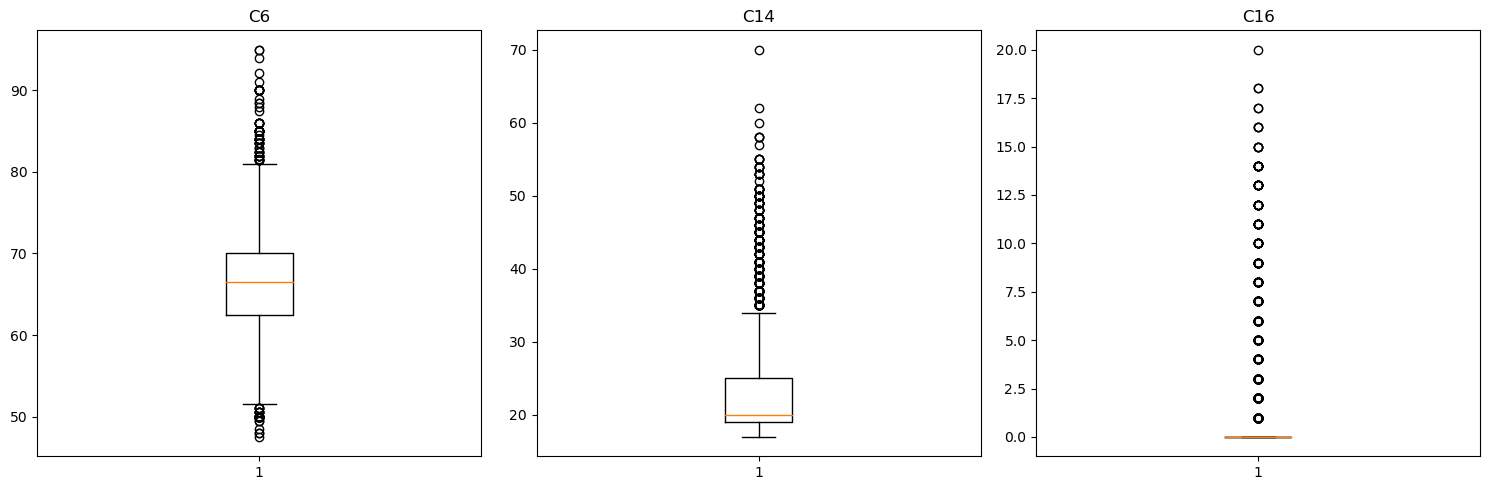

In [4]:
# Identify which ones are discrete or continuous. Describe the distri- bution (e.g., mean, median, range, variance) of the first 3 numerical features
print(train.describe())

# use boxplot to visualize the distribution of the first 3 numerical features
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].boxplot(train.iloc[:, 6].dropna())  # Drop NA values for plotting
ax[0].set_title(train.columns[6])
ax[1].boxplot(train.iloc[:, 14].dropna())  # Drop NA values for plotting
ax[1].set_title(train.columns[14])
ax[2].boxplot(train.iloc[:, 16].dropna())  # Drop NA values for plotting
ax[2].set_title(train.columns[16])
plt.tight_layout()
plt.show()

# save the plots to ./pic/boxplot.png
os.makedirs('./pic', exist_ok=True)
fig.savefig('./pic/boxplot.png')

In [5]:
#  Identify which ones are binary, nominal, or ordinal.

# binary features
binary_features = [col for col in train.columns if train[col].nunique() == 2]
print('Binary features:', binary_features)

# nominal features
nominal_features = [col for col in train.columns if train[col].nunique() > 2 and train[col].dtype == 'object']
print('Nominal features:', nominal_features)

# ordinal features
ordinal_features = [col for col in train.columns if not col in nominal_features and not col in binary_features and train[col].dtype == 'object']
print('Ordinal features:', ordinal_features)

Binary features: ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15', 'classification target']
Nominal features: ['C0', 'C1', 'C2', 'C3', 'C5', 'C7']
Ordinal features: []


C0
single               3115
married               296
divorced               75
facto union            18
legally separated       3
widower                 3
Name: count, dtype: int64
C1
1st phase - general contingent                         1351
2nd phase - general contingent                          708
Over 23 years old                                       630
Change of course                                        253
Technological specialization diploma holders            160
Holders of other higher courses                         109
3rd phase - general contingent                          105
Transfer                                                 67
Change of institution/course                             45
Short cycle diploma holders                              30
1st phase - special contingent (Madeira Island)          29
International student (bachelor)                         26
1st phase - special contingent (Azores Island)           14
Ordinance No. 854-B/99          

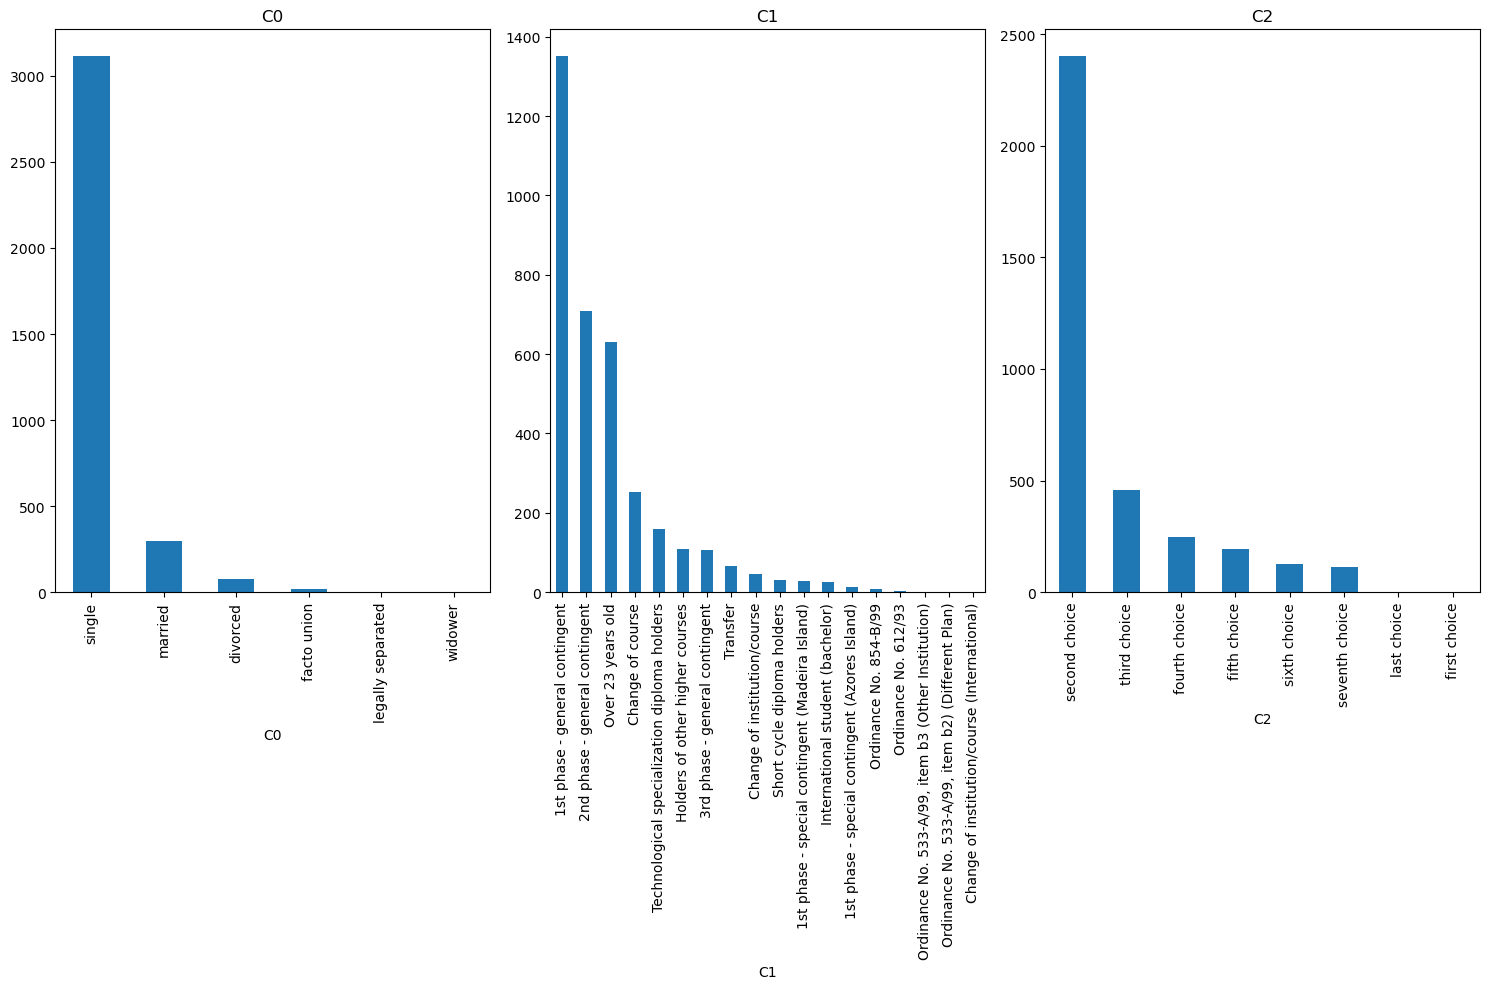

In [6]:
# count the number of unique values for first 3 cagetorical features
for col in nominal_features[:3]:
    print(train[col].value_counts())

# visualize the distribution of the first 3 categorical features
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
train[nominal_features[0]].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title(nominal_features[0])

train[nominal_features[1]].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title(nominal_features[1])

train[nominal_features[2]].value_counts().plot(kind='bar', ax=ax[2])
ax[2].set_title(nominal_features[2])

plt.tight_layout()
plt.show()

# save the plots to ./pic/categorical.png
# the hight should be able to adjust
fig.savefig('./pic/categorical.png')


In [7]:
# Identify potential outliers in the first 3 numerical features.
# using Z-score to identify the outliers
for i in [6,14,16]:
    z = np.abs(stats.zscore(train.iloc[:, i]))
    print(np.where(z > 3))


(array([  59,  176,  207,  342,  971, 1156, 1840, 2272, 2282, 2447, 2448,
       2535, 2624, 3259, 3300, 3373, 3487, 3490], dtype=int64),)
(array([  99,  252,  278,  280,  291,  394,  403,  432,  513,  553,  607,
        687,  695,  719,  722,  790,  985,  987, 1018, 1036, 1214, 1233,
       1244, 1266, 1316, 1388, 1408, 1455, 1508, 1512, 1515, 1573, 1581,
       1647, 1691, 1725, 1756, 1782, 1891, 1892, 1906, 1966, 1972, 2020,
       2119, 2125, 2126, 2140, 2178, 2195, 2260, 2317, 2406, 2450, 2509,
       2557, 2613, 2650, 2674, 2702, 2731, 2787, 2827, 2831, 2856, 2895,
       2930, 3048, 3069, 3075, 3077, 3111, 3112, 3126, 3187, 3210, 3327,
       3343, 3412], dtype=int64),)
(array([  18,   33,   83,  150,  152,  173,  278,  337,  362,  391,  424,
        474,  493,  508,  513,  516,  522,  526,  549,  552,  555,  586,
        609,  643,  657,  683,  771,  783,  851,  909,  912,  916,  947,
       1106, 1112, 1174, 1180, 1189, 1240, 1243, 1244, 1298, 1299, 1316,
       1364, 1412, 14

In [8]:
for i in [6, 14, 16]:  # Column indices for which to identify outliers
    q1 = train.iloc[:, i].quantile(0.25)
    q3 = train.iloc[:, i].quantile(0.75)
    iqr = q3 - q1
    
    # Define the conditions for outliers
    outlier_condition = (train.iloc[:, i] < (q1 - 1.5 * iqr)) | (train.iloc[:, i] > (q3 + 1.5 * iqr))
    
    outlier_indices = train.index[outlier_condition].tolist()
    
    # Print the feature index and the outlier indices for that feature
    print(f"Feature index {i} has outliers at row indices:", outlier_indices)

Feature index 6 has outliers at row indices: [18, 20, 59, 77, 93, 101, 114, 171, 176, 201, 207, 278, 307, 322, 323, 330, 342, 382, 387, 472, 498, 508, 523, 537, 542, 549, 553, 583, 607, 635, 721, 745, 764, 776, 786, 795, 796, 803, 807, 821, 848, 912, 971, 987, 1021, 1031, 1036, 1054, 1156, 1182, 1194, 1217, 1224, 1235, 1244, 1261, 1284, 1307, 1333, 1386, 1390, 1407, 1451, 1482, 1485, 1516, 1571, 1602, 1628, 1629, 1669, 1683, 1711, 1747, 1840, 1851, 1861, 1871, 1884, 1890, 1892, 1932, 1944, 1966, 1972, 1985, 2026, 2047, 2050, 2051, 2177, 2178, 2197, 2256, 2263, 2272, 2282, 2293, 2333, 2373, 2391, 2411, 2413, 2415, 2422, 2447, 2448, 2535, 2539, 2598, 2616, 2622, 2624, 2675, 2737, 2756, 2763, 2773, 2803, 2809, 2816, 2835, 2915, 2968, 3003, 3043, 3072, 3085, 3144, 3153, 3194, 3206, 3236, 3259, 3260, 3272, 3278, 3300, 3317, 3332, 3370, 3373, 3427, 3431, 3487, 3490, 3536]
Feature index 14 has outliers at row indices: [0, 3, 40, 47, 49, 85, 99, 117, 133, 136, 160, 173, 215, 236, 244, 252, 255

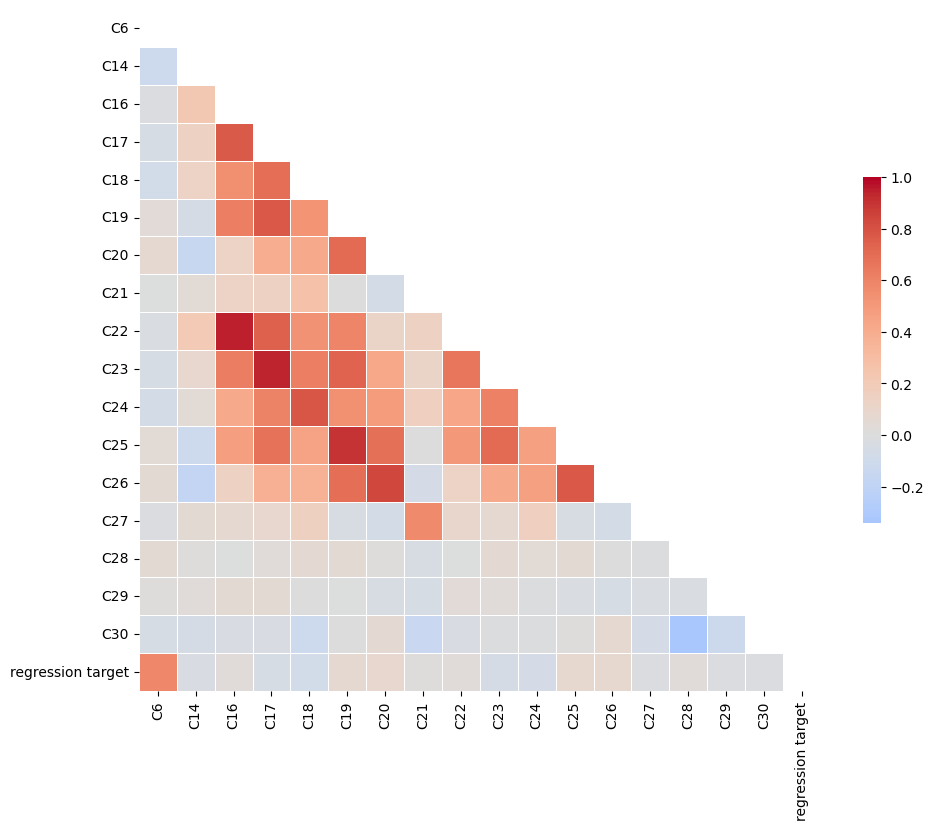

In [9]:
# Visualize the correlation between every two features (numerical features only, including the regression targets) with a heatmap.

# Compute the correlation matrix for the numerical features
train = train.select_dtypes(include=[np.number])
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# save the plots to ./pic/heatmap.png
fig.savefig('./pic/heatmap.png')


In [10]:
# find the highly correlated features
high_corr_mask = np.abs(corr) > 0.7
np.fill_diagonal(high_corr_mask.values, False)  # Exclude diagonal

high_corr_locations = np.where(high_corr_mask)
unique_pairs = set()
for x, y in zip(*high_corr_locations):
    if x < y:  
        unique_pairs.add((corr.columns[x], corr.columns[y]))

for (feature1, feature2) in unique_pairs:
    print(f"Features {feature1} and {feature2} have a correlation of {corr.loc[feature1, feature2]:.2f}")

Features C19 and C20 have a correlation of 0.71
Features C18 and C24 have a correlation of 0.78
Features C17 and C23 have a correlation of 0.94
Features C17 and C22 have a correlation of 0.75
Features C16 and C17 have a correlation of 0.76
Features C20 and C26 have a correlation of 0.84
Features C23 and C25 have a correlation of 0.70
Features C19 and C25 have a correlation of 0.90
Features C19 and C23 have a correlation of 0.73
Features C17 and C19 have a correlation of 0.77
Features C16 and C22 have a correlation of 0.94
Features C25 and C26 have a correlation of 0.77


In [11]:
from sklearn.preprocessing import OneHotEncoder

# set a random seed for reproducibility
np.random.seed(0)
encoder = OneHotEncoder(sparse=False)
X = [['红色'], ['蓝色'], ['绿色'], ['红色'],['sb'],['notsb']]
X_encoded = encoder.fit_transform(X)

print(X_encoded[0,:])



[0. 0. 1. 0. 0.]


c:\Appliciation\anaconda\envs\comp4211\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
